# Временные ряды в алготрейдинге
## Что такое временные ряды?
Временной ряд — это последовательность данных, полученных в последовательные моменты времени. В контексте алготрейдинга временные ряды представляют собой упорядоченную по времени последовательность значений цен, объемов торгов или других финансовых показателей

## Зачем нужны временные ряды в алготрейдинге?
## Временные ряды играют центральную роль в алгоритмической торговле по следующим причинам:

1. Прогнозирование: основная цель анализа временных рядов - предсказание будущих значений на основе прошлых данных
2. Выявление паттернов: временные ряды помогают идентифицировать повторяющиеся паттерны, тренды и сезонность в ценовых движениях
3. Разработка стратегий: на основе анализа временных рядов трейдеры разрабатывают торговые стратегии
4. Оценка рисков: исторические данные позволяют оценить волатильность и риски
5. Бэктестинг: тестирование торговых алгоритмов на исторических данных для оценки их эффективности

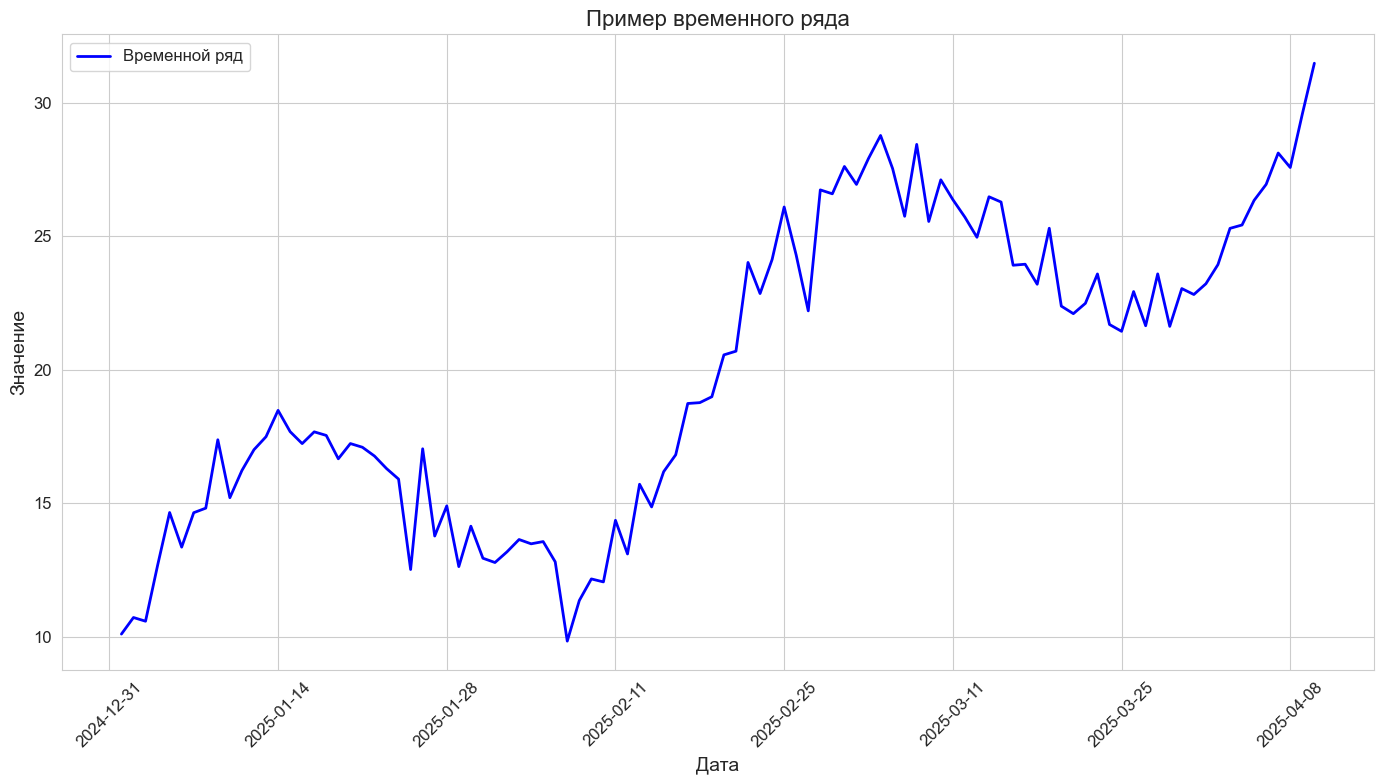

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns

# Настройка стиля для графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Создаем временной ряд из 100 дней
start_date = datetime(2025, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(100)]

# Генерируем значения с трендом, сезонностью и случайным шумом
trend = np.linspace(10, 30, 100)  # Линейный восходящий тренд
seasonality = 5 * np.sin(np.linspace(0, 4*np.pi, 100))  # Сезонный компонент
noise = np.random.normal(0, 1, 100)  # Случайный шум

# Комбинируем компоненты
values = trend + seasonality + noise

# Создаем DataFrame
ts_df = pd.DataFrame({
    'date': dates,
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'noise': noise
})

# Устанавливаем дату как индекс
ts_df.set_index('date', inplace=True)

# Визуализируем временной ряд
plt.figure(figsize=(14, 8))
plt.plot(ts_df.index, ts_df['value'], label='Временной ряд', color='blue', linewidth=2)
plt.title('Пример временного ряда', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Значение', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# Форматируем оси даты
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

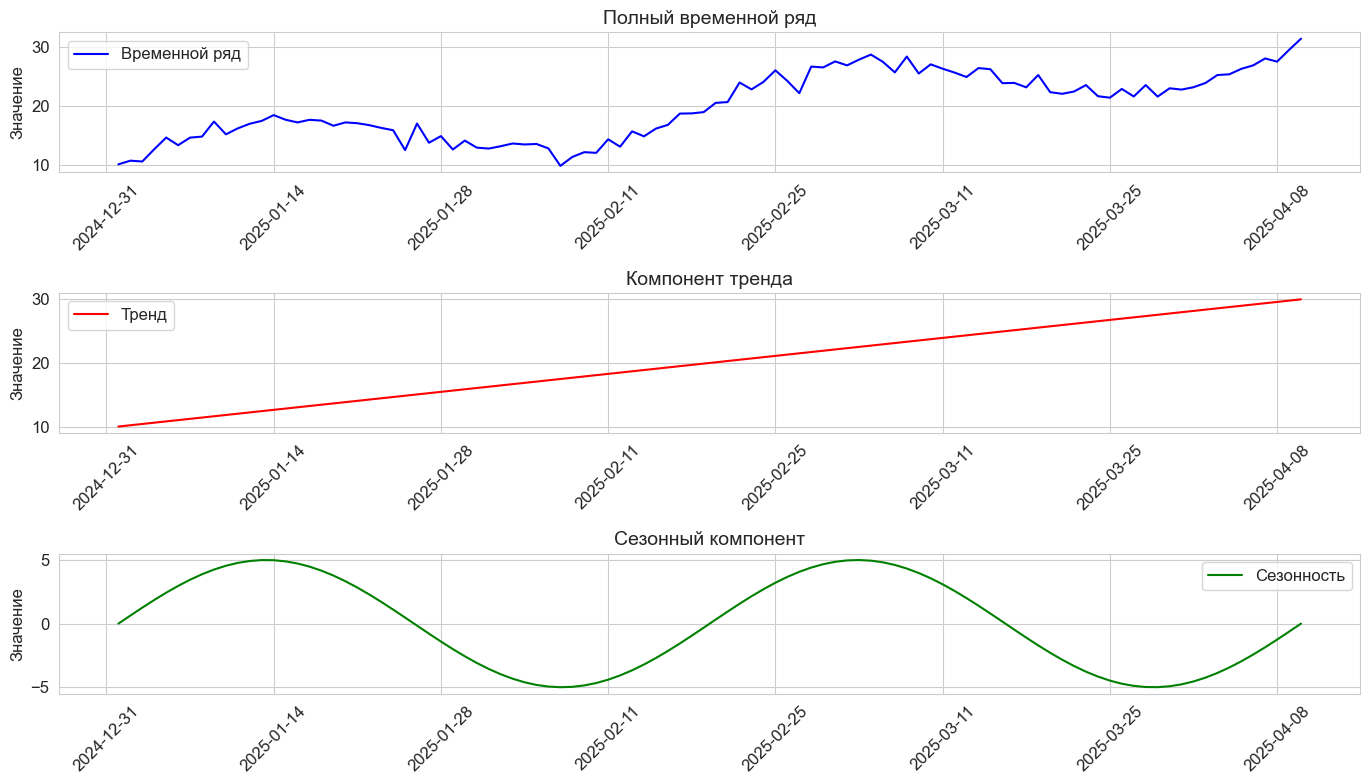

In [5]:
# Визуализация компонентов временного ряда
plt.figure(figsize=(14, 8))

# Исходный временной ряд
plt.subplot(3, 1, 1)
plt.plot(ts_df.index, ts_df['value'], label='Временной ряд', color='blue')
plt.ylabel('Значение')
plt.title('Полный временной ряд', fontsize=14)
plt.grid(True)
plt.legend()

# Тренд
plt.subplot(3, 1, 2)
plt.plot(ts_df.index, ts_df['trend'], label='Тренд', color='red')
plt.ylabel('Значение')
plt.title('Компонент тренда', fontsize=14)
plt.grid(True)
plt.legend()

# Сезонность
plt.subplot(3, 1, 3)
plt.plot(ts_df.index, ts_df['seasonality'], label='Сезонность', color='green')
plt.ylabel('Значение')
plt.title('Сезонный компонент', fontsize=14)
plt.grid(True)
plt.legend()

# Форматируем оси даты для всех подграфиков
for i in range(1, 4): 
    ax = plt.subplot(3, 1, i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Установка необходимых библиотек
!pip install python-binance pandas matplotlib numpy

                         open      high       low     close      volume  \
timestamp                                                                 
2025-04-25 16:00:00  95061.21  95381.52  94726.86  95223.81   827.35336   
2025-04-25 17:00:00  95223.82  95554.99  94370.35  94527.79  1213.55237   
2025-04-25 18:00:00  94527.79  95228.28  94527.79  94970.15   741.12878   
2025-04-25 19:00:00  94970.16  95318.26  94879.05  95291.00   754.07570   
2025-04-25 20:00:00  95291.00  95345.45  94777.00  94869.57   537.75825   

                                 close_time  quote_asset_volume  \
timestamp                                                         
2025-04-25 16:00:00 2025-04-25 16:59:59.999        7.866608e+07   
2025-04-25 17:00:00 2025-04-25 17:59:59.999        1.153378e+08   
2025-04-25 18:00:00 2025-04-25 18:59:59.999        7.034215e+07   
2025-04-25 19:00:00 2025-04-25 19:59:59.999        7.171771e+07   
2025-04-25 20:00:00 2025-04-25 20:59:59.999        5.110625e+07   

    

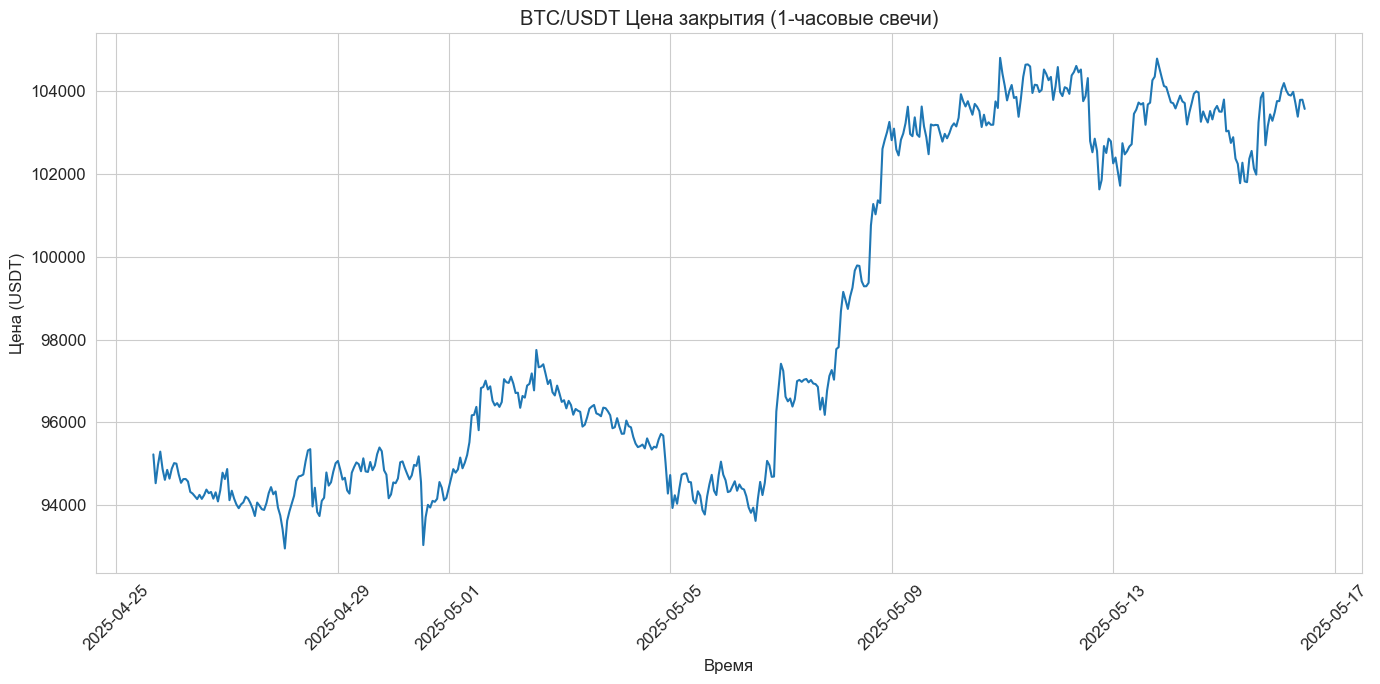

In [7]:
from binance.client import Client
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Инициализация клиента Binance без ключей API 
client = Client()

# Получение исторических данных по свечам (Klines) для BTC/USDT
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, limit=500)

# Преобразуем данные в pandas DataFrame
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 
           'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 
           'taker_buy_quote_asset_volume', 'ignore']

df = pd.DataFrame(klines, columns=columns)

# Преобразуем числовые столбцы в float
for col in columns[1:]:
    if col != 'timestamp' and col != 'close_time' and col != 'number_of_trades':
        df[col] = df[col].astype(float)
        
# Преобразуем timestamp в datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

# Установим timestamp в качестве индекса
df.set_index('timestamp', inplace=True)

# Проверим полученные данные
print(df.head())

# Визуализируем временной ряд цены закрытия (close)
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'])
plt.title('BTC/USDT Цена закрытия (1-часовые свечи)')
plt.xlabel('Время')
plt.ylabel('Цена (USDT)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Рассмотрим пример из жизни, чтобы легче было понять что это и как ими пользоваться

Пример - анализ посещаемости кофейни. Мы смоделируем количество посетителей кофейни за последние 90 дней и применим два базовых метода оценки временного ряда

# Часть 1: Создание данных и визуализация

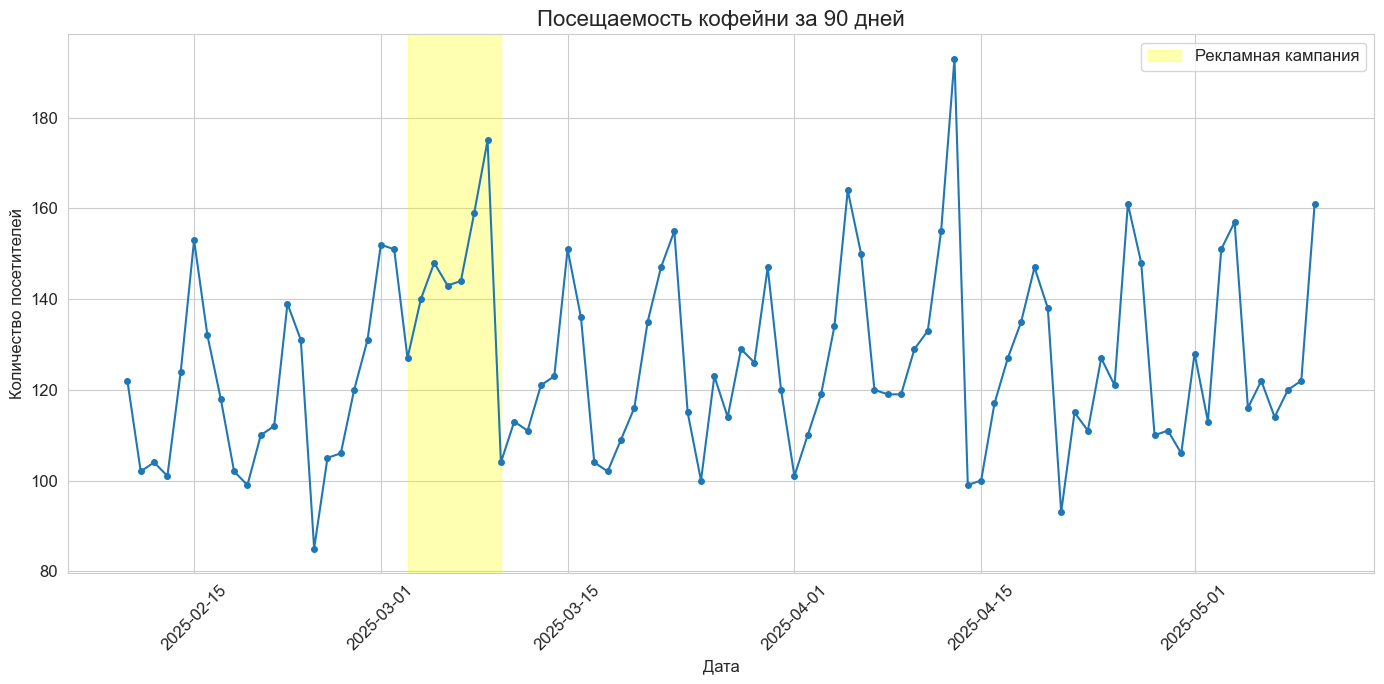

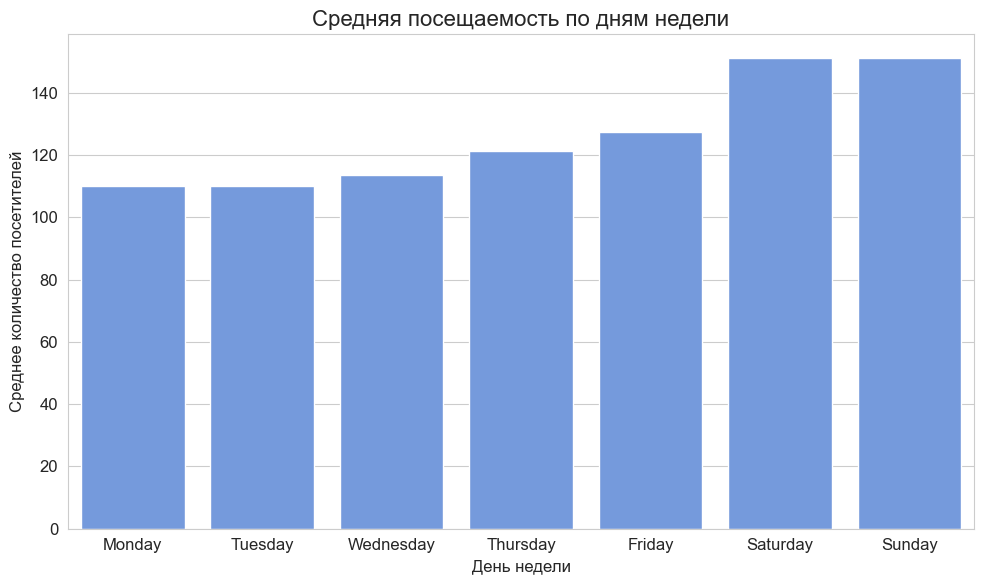

Статистика посещаемости кофейни:
Минимальное количество посетителей: 85
Максимальное количество посетителей: 193
Среднее количество посетителей: 126.1
Медианное количество посетителей: 122.0
Всего обслужено посетителей за 90 дней: 11352


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Настройка стиля графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Создаем даты для 90 дней
start_date = datetime(2025, 2, 10)  # Начинаем с 10 февраля 2025
dates = [start_date + timedelta(days=i) for i in range(90)]

# Моделируем посещаемость кофейни
# Базовая посещаемость
base_visitors = 100

# Добавляем недельную сезонность
# В выходные (суббота, воскресенье) больше посетителей
day_of_week_effect = np.array([0, 0, 5, 10, 15, 40, 45])  # Пн, Вт, Ср, Чт, Пт, Сб, Вс

# Эффект времени года: постепенно становится теплее, растет продажа холодных напитков
seasonal_trend = np.linspace(0, 15, 90)  

# Рекламная кампания на четвертой неделе (резкий скачок посещаемости)
promo_effect = np.zeros(90)
promo_effect[21:28] = 30  # Неделя активной рекламы

# Случайные колебания
noise = np.random.normal(0, 10, 90)

# Собираем компоненты вместе
visitors = []
for i, date in enumerate(dates):
    # Получаем день недели (0 - понедельник, 6 - воскресенье)
    weekday = date.weekday()
    
    # Рассчитываем количество посетителей
    daily_visitors = (base_visitors + 
                      day_of_week_effect[weekday] + 
                      seasonal_trend[i] + 
                      promo_effect[i] + 
                      noise[i])
    
    visitors.append(round(daily_visitors))  # Округляем, так как это количество людей

# Создаем DataFrame
cafe_df = pd.DataFrame({
    'date': dates,
    'visitors': visitors
})

# Устанавливаем дату как индекс
cafe_df.set_index('date', inplace=True)

# Добавляем столбец с днями недели
cafe_df['day_of_week'] = cafe_df.index.day_name()

# Визуализируем данные
plt.figure(figsize=(14, 7))
plt.plot(cafe_df.index, cafe_df['visitors'], marker='o', linestyle='-', markersize=4)
plt.title('Посещаемость кофейни за 90 дней', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество посетителей', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Аннотируем рекламную кампанию
promo_start = start_date + timedelta(days=21)
plt.axvspan(promo_start, promo_start + timedelta(days=7), color='yellow', alpha=0.3, label='Рекламная кампания')
plt.legend()

plt.tight_layout()
plt.show()

# Посмотрим на посещаемость по дням недели
plt.figure(figsize=(10, 6))
avg_by_day = cafe_df.groupby('day_of_week')['visitors'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Исправленная строка - используем color вместо palette
sns.barplot(x=avg_by_day.index, y=avg_by_day.values, color='cornflowerblue')
plt.title('Средняя посещаемость по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Среднее количество посетителей', fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print("Статистика посещаемости кофейни:")
print(f"Минимальное количество посетителей: {cafe_df['visitors'].min()}")
print(f"Максимальное количество посетителей: {cafe_df['visitors'].max()}")
print(f"Среднее количество посетителей: {cafe_df['visitors'].mean():.1f}")
print(f"Медианное количество посетителей: {cafe_df['visitors'].median()}")
print(f"Всего обслужено посетителей за 90 дней: {cafe_df['visitors'].sum()}")

# Часть 2: Сделаем оценку временного ряда
## Используем 1 метод
Декомпозиция временного ряда на составляющие: тренд, сезонность, чтобы понять саму структуру данных. Декомпозиция временного ряда — это аналитический метод, который разделяет временной ряд на несколько базовых компонентов, каждый из которых представляет определенную закономерность данных

## Основные компоненты временного ряда
1. Тренд (T) — долгосрочная тенденция изменения данных. Это общее направление, в котором движется временной ряд (рост, спад или стабильность)
   Вычисляем среднее значение из 7 значений
2. Сезонность (S) — регулярные колебания, повторяющиеся с определенным периодом
   Из исходного ряда вычитается тренд (детрендирование): detrended = observed - trend. Детрендированный ряд группируется по позиции по дню недели, после для наших данных вычисляется среднеее значение
3. Циклический компонент (C) — нерегулярные колебания с более длительным и менее предсказуемым периодом, чем сезонные
4. Остаток или шум (R) — нерегулярные, случайные колебания, которые нельзя отнести к тренду, сезонности или циклам

### Для декомпозиции временного ряда мы использовали библиотеку statsmodels, а именно функцию seasonal_decompose из модуля statsmodels.tsa.seasonal

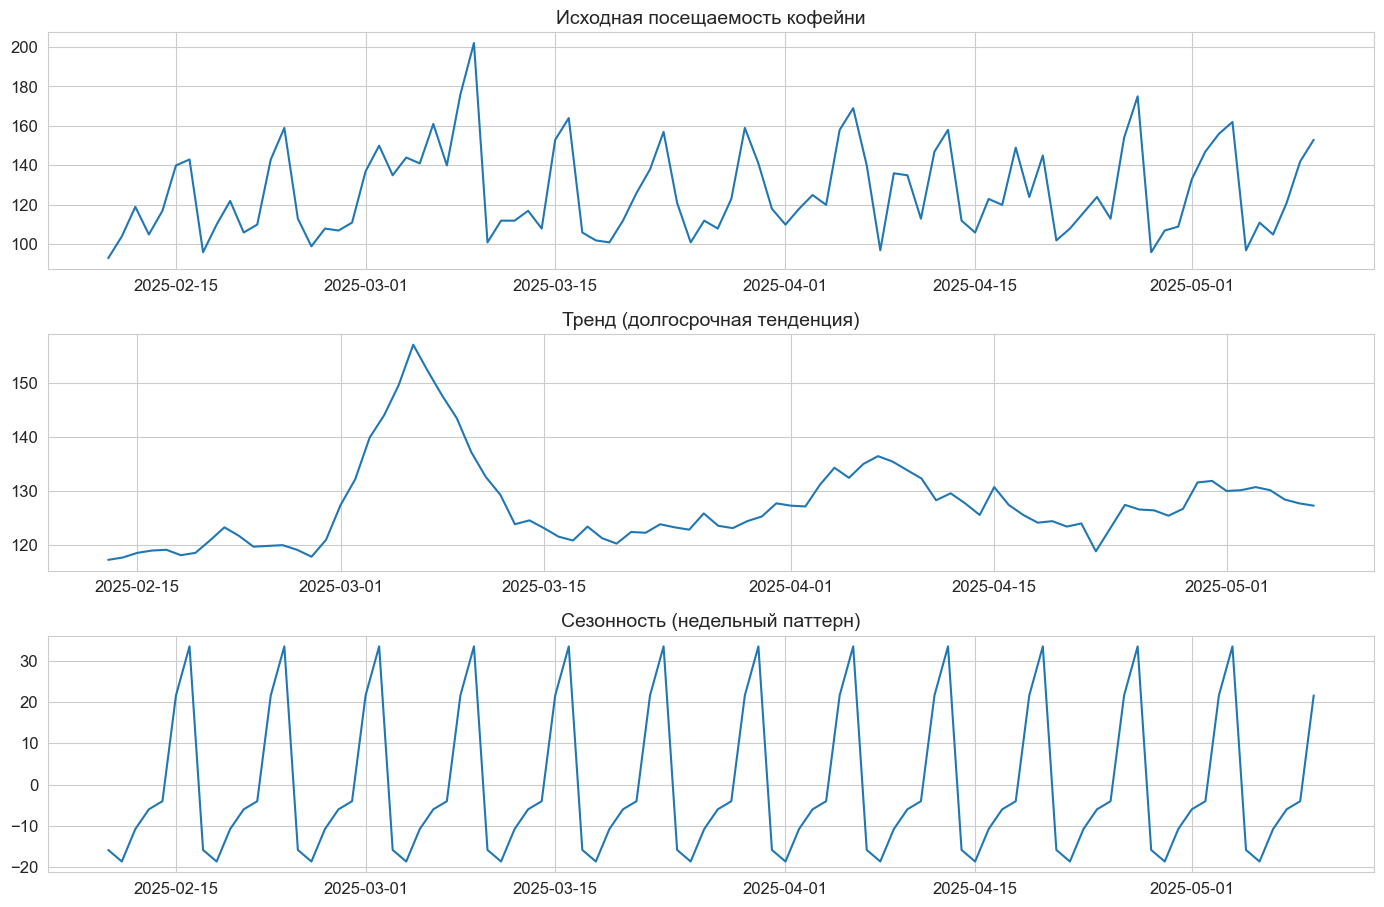


Анализ декомпозиции временного ряда:
1. Тренд: Показывает общее увеличение посещаемости с течением времени (сезонное потепление)
2. Сезонность: Четко видна недельная сезонность - выходные дни значительно популярнее

Относительная сила компонентов:
- Тренд: 34.8% от общей вариации
- Сезонность: 79.5% от общей вариации

Практический вывод: Недельная сезонность - ключевой фактор посещаемости.
Рекомендация: Планируйте больше персонала на выходные дни и меньше в начале недели.


In [44]:
# Создаем копию DataFrame с частотой "D" (день) для корректной работы декомпозиции
cafe_df_freq = cafe_df['visitors'].asfreq('D')

# Декомпозиция ряда с периодом 7 дней (недельная сезонность)
decomposition = seasonal_decompose(cafe_df_freq, model='additive', period=7)

# Визуализируем результаты декомпозиции
plt.figure(figsize=(14, 12))

# Исходный ряд
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Исходная посещаемость кофейни', fontsize=14)
plt.grid(True)

# Тренд
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Тренд (долгосрочная тенденция)', fontsize=14)
plt.grid(True)

# Сезонность
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Сезонность (недельный паттерн)', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

# Интерпретация результатов
print("\nАнализ декомпозиции временного ряда:")
print("1. Тренд: Показывает общее увеличение посещаемости с течением времени (сезонное потепление)")
print("2. Сезонность: Четко видна недельная сезонность - выходные дни значительно популярнее")

# Давайте посмотрим на силу компонентов
trend_strength = decomposition.trend.dropna().std() / cafe_df_freq.std() * 100
seasonal_strength = decomposition.seasonal.std() / cafe_df_freq.std() * 100

print(f"\nОтносительная сила компонентов:")
print(f"- Тренд: {trend_strength:.1f}% от общей вариации")
print(f"- Сезонность: {seasonal_strength:.1f}% от общей вариации")

# Практические выводы
if seasonal_strength > trend_strength and seasonal_strength > residual_strength:
    print("\nПрактический вывод: Недельная сезонность - ключевой фактор посещаемости.")
    print("Рекомендация: Планируйте больше персонала на выходные дни и меньше в начале недели.")
elif trend_strength > seasonal_strength:
    print("\nПрактический вывод: Долгосрочный тренд важнее сезонности.")
    print("Рекомендация: Подготовьтесь к устойчивому росту посещаемости в ближайшие месяцы.")

## Используем метод 2
### Прогнозирование будущей посещаемости с простой моделью скользящего среднего

### Используемые библиотеки
В этом коде мы использовали несколько ключевых библиотек Python для анализа и визуализации данных:
1. pandas - для манипуляции данными (создание DataFrame, индексация, работа с временными рядами)
2. matplotlib.pyplot - для визуализации данных (создание графиков)
3. datetime и timedelta - для работы с датами и временными интервалами

$MA(t, n) = \frac{Y(t) + Y(t-1) + \ldots + Y(t-n+1)}{n}$ где:
* Y(t) — это cafe_df['visitors'], количество посетителей в день t
* n — это window=7, размер окна (7 дней)
* MA(t, n) — это cafe_df['MA7'], результат скользящего среднего

### Делаем прогноз 
recent_trend = (visitors[последний_день] - visitors[последний_день - 14]) / 14

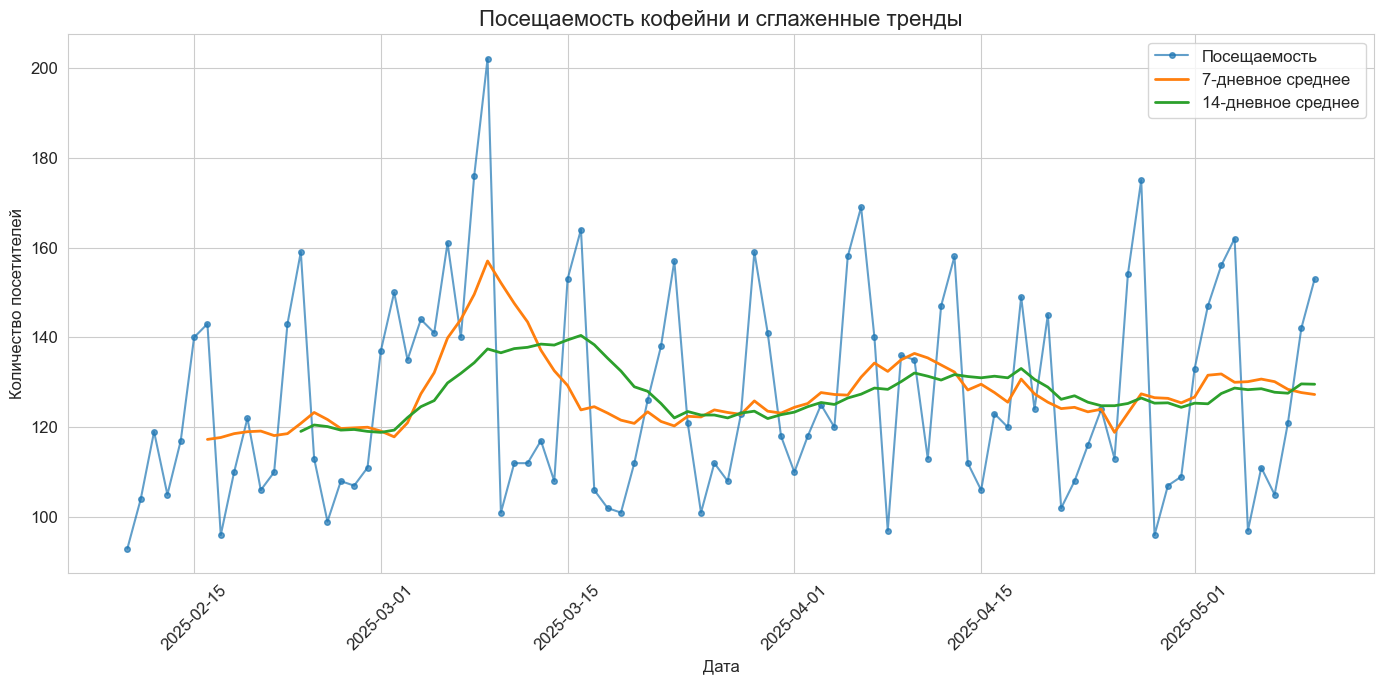

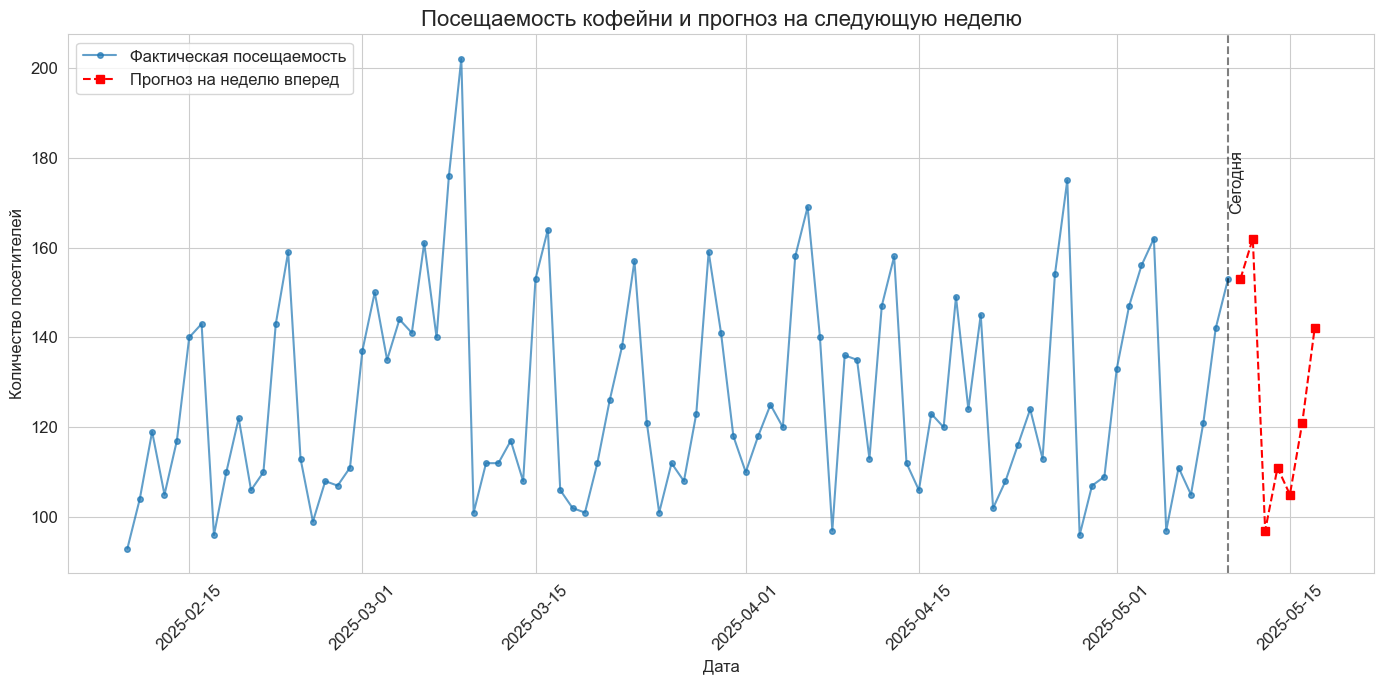


Прогноз посещаемости на следующую неделю:
Sunday, 11 May: 153 посетителей
Monday, 12 May: 162 посетителей
Tuesday, 13 May: 97 посетителей
Wednesday, 14 May: 111 посетителей
Thursday, 15 May: 105 посетителей
Friday, 16 May: 121 посетителей
Saturday, 17 May: 142 посетителей

Ожидаемое количество посетителей за неделю: 891
Ожидаемая выручка при среднем чеке 500 руб.: 445,500 руб.
Sunday: Необходимо 8 сотрудников
Monday: Необходимо 8 сотрудников
Tuesday: Необходимо 5 сотрудников
Wednesday: Необходимо 6 сотрудников
Thursday: Необходимо 5 сотрудников
Friday: Необходимо 6 сотрудников
Saturday: Необходимо 7 сотрудников


In [63]:
# Создаем скользящее среднее для сглаживания данных
cafe_df['MA7'] = cafe_df['visitors'].rolling(window=7).mean()  # 7-дневное скользящее среднее
cafe_df['MA14'] = cafe_df['visitors'].rolling(window=14).mean()  # 14-дневное скользящее среднее

# Визуализируем данные со скользящими средними
plt.figure(figsize=(14, 7))
plt.plot(cafe_df.index, cafe_df['visitors'], marker='o', linestyle='-', 
         markersize=4, label='Посещаемость', alpha=0.7)
plt.plot(cafe_df.index, cafe_df['MA7'], linewidth=2, label='7-дневное среднее')
plt.plot(cafe_df.index, cafe_df['MA14'], linewidth=2, label='14-дневное среднее')

plt.title('Посещаемость кофейни и сглаженные тренды', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество посетителей', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Простой прогноз: используем недельную сезонность и тренд последних дней
# Прогнозируем на неделю вперед
last_date = cafe_df.index[-1]
forecast_dates = [last_date + timedelta(days=i+1) for i in range(7)]

# Получаем средний тренд за последние 14 дней
recent_trend = (cafe_df['visitors'].iloc[-1] - cafe_df['visitors'].iloc[-15]) / 14

# Прогноз на следующие 7 дней
forecasts = []
for i, date in enumerate(forecast_dates):
    # Определяем день недели
    weekday = date.weekday()
    
    # Берем значение похожего дня недели из последней недели и добавляем тренд
    similar_day_value = cafe_df['visitors'].iloc[-(7-weekday)]
    forecast_value = similar_day_value + recent_trend * (i+1)
    forecasts.append(round(forecast_value))

# Создаем DataFrame для прогноза
forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'forecasted_visitors': forecasts
})
forecast_df.set_index('date', inplace=True)

# Объединяем фактические данные и прогноз для визуализации
extended_df = pd.concat([cafe_df['visitors'], forecast_df['forecasted_visitors']], axis=1)

# Визуализируем фактические данные и прогноз
plt.figure(figsize=(14, 7))
plt.plot(cafe_df.index, cafe_df['visitors'], marker='o', linestyle='-', 
         markersize=4, label='Фактическая посещаемость', alpha=0.7)
plt.plot(forecast_df.index, forecast_df['forecasted_visitors'], marker='s', linestyle='--', 
         markersize=6, color='red', label='Прогноз на неделю вперед')

plt.title('Посещаемость кофейни и прогноз на следующую неделю', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество посетителей', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Добавляем вертикальную линию, отделяющую факт от прогноза
plt.axvline(x=last_date, color='black', linestyle='--', alpha=0.5)
plt.text(last_date, cafe_df['visitors'].max() * 0.9, 'Сегодня', rotation=90, verticalalignment='top')

plt.tight_layout()
plt.show()

# Выводим прогноз на следующую неделю
print("\nПрогноз посещаемости на следующую неделю:")
for date, visitors in zip(forecast_dates, forecasts):
    print(f"{date.strftime('%A, %d %B')}: {visitors} посетителей")

# Рассчитываем ожидаемую выручку, если средний чек составляет 500 рублей
avg_bill = 500  # рублей
total_forecasted_visitors = sum(forecasts)
expected_revenue = total_forecasted_visitors * avg_bill

print(f"\nОжидаемое количество посетителей за неделю: {total_forecasted_visitors}")
print(f"Ожидаемая выручка при среднем чеке {avg_bill} руб.: {expected_revenue:,.0f} руб.")

# Оцениваем потребность в персонале, если один сотрудник обслуживает 20 клиентов в день
staff_capacity = 20  # клиентов на одного сотрудника
for date, visitors in zip(forecast_dates, forecasts):
    staff_needed = max(1, round(visitors / staff_capacity))
    print(f"{date.strftime('%A')}: Необходимо {staff_needed} сотрудников")

# Рассмотрим типы временных рядов

1. Детерминированные ряды
2. Недетерминированные ряды
3. Стационарные ряды
4. Нестационарные ряды

## 1. Детерминированные ряды

Это ряды, значения которых можно точно предсказать, зная их предыдущие значения или математическую формулу, по которой они строятся. Они не содержат случайного компонента.

### Пример из жизни: Потребление электроэнергии в офисе по времени суток
Офисное здание потребляет электроэнергию по чёткому расписанию: минимум ночью, рост с 8 утра, пик с 9 до 18, затем снижение.

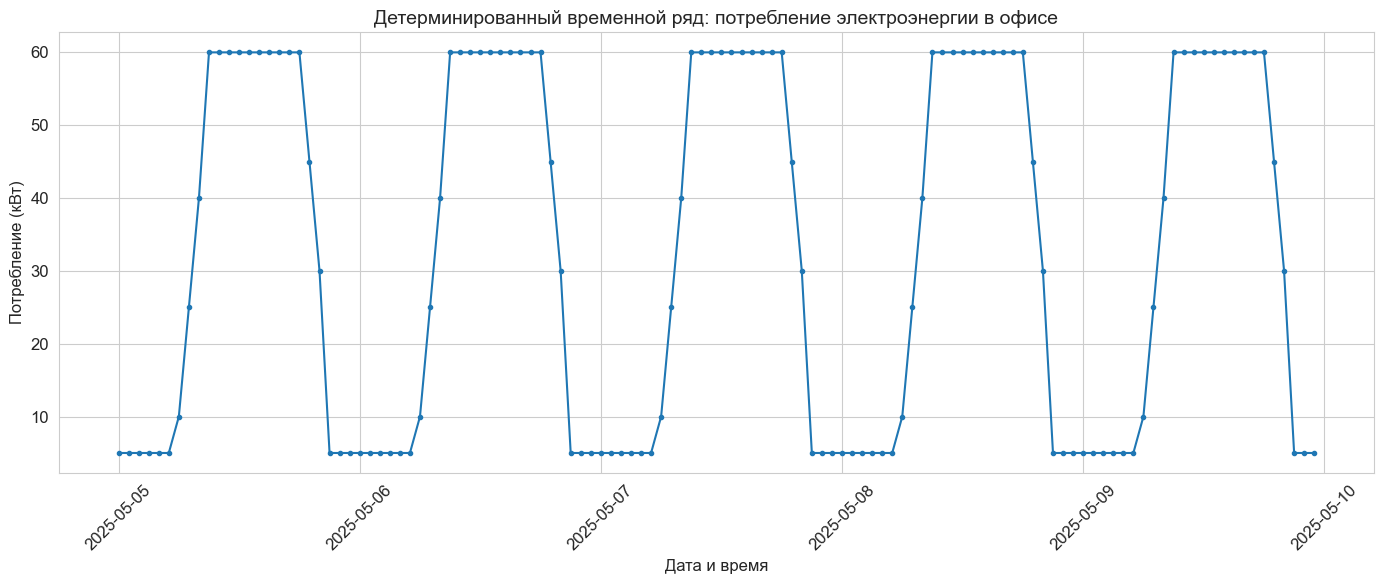

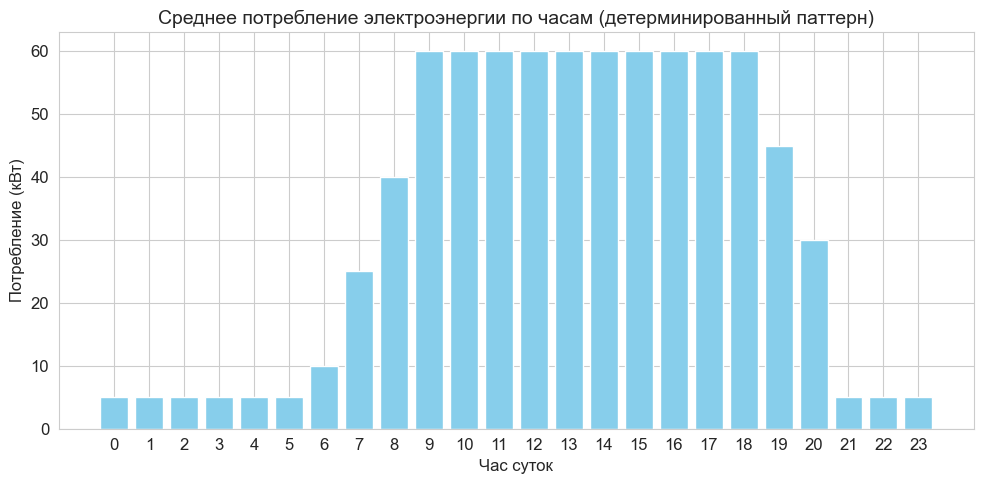

Детерминированный ряд имеет следующие характеристики:
- Среднее значение: 33.12 кВт
- Максимальное значение: 60 кВт (в рабочие часы)
- Минимальное значение: 5 кВт (ночью)
- Стандартное отклонение: 25.22 кВт
- Отсутствие случайности: значения полностью определяются часом суток и типом дня


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Настройка стиля графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Создаем даты для 5 рабочих дней с почасовыми данными
start_date = datetime(2025, 5, 5)  # Понедельник
dates = []
for day in range(5):  # 5 рабочих дней
    for hour in range(24):  # 24 часа в сутках
        dates.append(start_date + timedelta(days=day, hours=hour))

# Создаем детерминированную функцию потребления электроэнергии
def office_power_consumption(hour, day_type='weekday'):
    """
    Детерминированная функция потребления электроэнергии в офисе
    hour: час суток (0-23)
    day_type: тип дня ('weekday' для рабочих, 'weekend' для выходных)
    """
    if day_type == 'weekend':
        return 5  # Минимальное потребление в выходные (только серверы и аварийное освещение)
    
    # Рабочие дни имеют четкий паттерн
    if 0 <= hour < 6:
        return 5  # Ночное минимальное потребление
    elif 6 <= hour < 8:
        return 10 + 15 * (hour - 6)  # Рост потребления перед рабочим днем
    elif 8 <= hour < 9:
        return 40 + 20 * (hour - 8)  # Быстрый рост при включении всех систем
    elif 9 <= hour < 18:
        return 60  # Стабильное потребление в рабочее время
    elif 18 <= hour < 21:
        return 60 - 15 * (hour - 18)  # Постепенное снижение после рабочего дня
    else:
        return 5  # Вечернее минимальное потребление

# Создаем временной ряд
power_values = []
for date in dates:
    hour = date.hour
    day_of_week = date.weekday()
    day_type = 'weekday' if day_of_week < 5 else 'weekend'
    power_values.append(office_power_consumption(hour, day_type))

# Создаем DataFrame
power_df = pd.DataFrame({
    'timestamp': dates,
    'power_consumption': power_values
})
power_df.set_index('timestamp', inplace=True)

# Визуализируем детерминированный временной ряд
plt.figure(figsize=(14, 6))
plt.plot(power_df.index, power_df['power_consumption'], marker='o', markersize=3)
plt.title('Детерминированный временной ряд: потребление электроэнергии в офисе', fontsize=14)
plt.xlabel('Дата и время', fontsize=12)
plt.ylabel('Потребление (кВт)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Анализ периодичности для детерминированного ряда
daily_pattern = power_df.groupby(power_df.index.hour)['power_consumption'].mean()

plt.figure(figsize=(10, 5))
plt.bar(daily_pattern.index, daily_pattern.values, color='skyblue')
plt.title('Среднее потребление электроэнергии по часам (детерминированный паттерн)', fontsize=14)
plt.xlabel('Час суток', fontsize=12)
plt.ylabel('Потребление (кВт)', fontsize=12)
plt.grid(True, axis='y')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("Детерминированный ряд имеет следующие характеристики:")
print(f"- Среднее значение: {power_df['power_consumption'].mean():.2f} кВт")
print(f"- Максимальное значение: {power_df['power_consumption'].max()} кВт (в рабочие часы)")
print(f"- Минимальное значение: {power_df['power_consumption'].min()} кВт (ночью)")
print(f"- Стандартное отклонение: {power_df['power_consumption'].std():.2f} кВт")
print("- Отсутствие случайности: значения полностью определяются часом суток и типом дня")

## 2. Недетерминированные ряды

Это ряды имеют случайный компонент, который делает точное предсказание невозможным, даже если известны все предыдущие значения

### Пример из жизни: Количество посетителей кафе
Хотя есть определенный паттерн посещаемости кафе, точное количество клиентов в конкретный день определяется многими случайными факторами

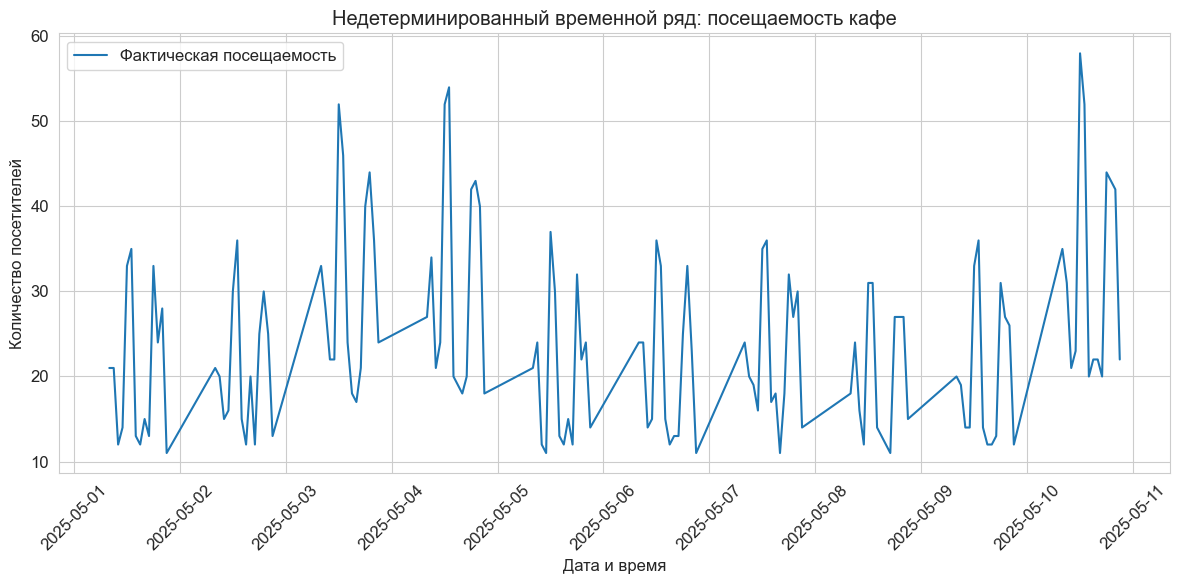

Среднее значение: 23.84 посетителей


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Настройка
np.random.seed(42)
start_date = datetime(2025, 5, 1)

# Создаем даты (упрощенно - только 10 дней с шагом в 1 час)
dates_cafe = [start_date + timedelta(days=d, hours=h) 
              for d in range(10) for h in range(8, 22)]

# Детерминированная функция (базовый паттерн)
def base_visitors(hour, day_of_week):
    # Выходные более загружены
    weekend_factor = 1.5 if day_of_week >= 5 else 1.0
    
    # Часы пик
    if 8 <= hour < 10:
        return int(15 * weekend_factor)  # Утренний кофе
    elif 12 <= hour < 14:
        return int(25 * weekend_factor)  # Обед
    elif 18 <= hour < 21:
        return int(20 * weekend_factor)  # Ужин
    else:
        return int(10 * weekend_factor)  # Обычные часы

# Генерируем данные с детерминированным и случайным компонентами
visitors = []
for date in dates_cafe:
    hour = date.hour
    day_of_week = date.weekday()
    
    # Базовое количество посетителей
    base = base_visitors(hour, day_of_week)
    
    # Добавляем случайность для создания недетерминированного ряда
    random_component = np.random.poisson(base * 0.4)
    visitors.append(base + random_component)

# Создаем DataFrame только с недетерминированным рядом
cafe_df = pd.DataFrame({
    'timestamp': dates_cafe,
    'visitors': visitors
})
cafe_df.set_index('timestamp', inplace=True)

# Визуализируем только недетерминированный временной ряд
plt.figure(figsize=(12, 6))
plt.plot(cafe_df.index, cafe_df['visitors'], label='Фактическая посещаемость')
plt.title('Недетерминированный временной ряд: посещаемость кафе')
plt.xlabel('Дата и время')
plt.ylabel('Количество посетителей')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Основные характеристики
print(f"Среднее значение: {cafe_df['visitors'].mean():.2f} посетителей")

## 3. Стационарные ряды

Это ряд, статистические свойства которого (среднее, дисперсия, автокорреляция) не изменяются со временем

### Пример из жизни: Температура воздуха в климат-контролируемом помещении
Температура в серверной комнате с климат-контролем колеблется вокруг заданного значения с постоянной дисперсией

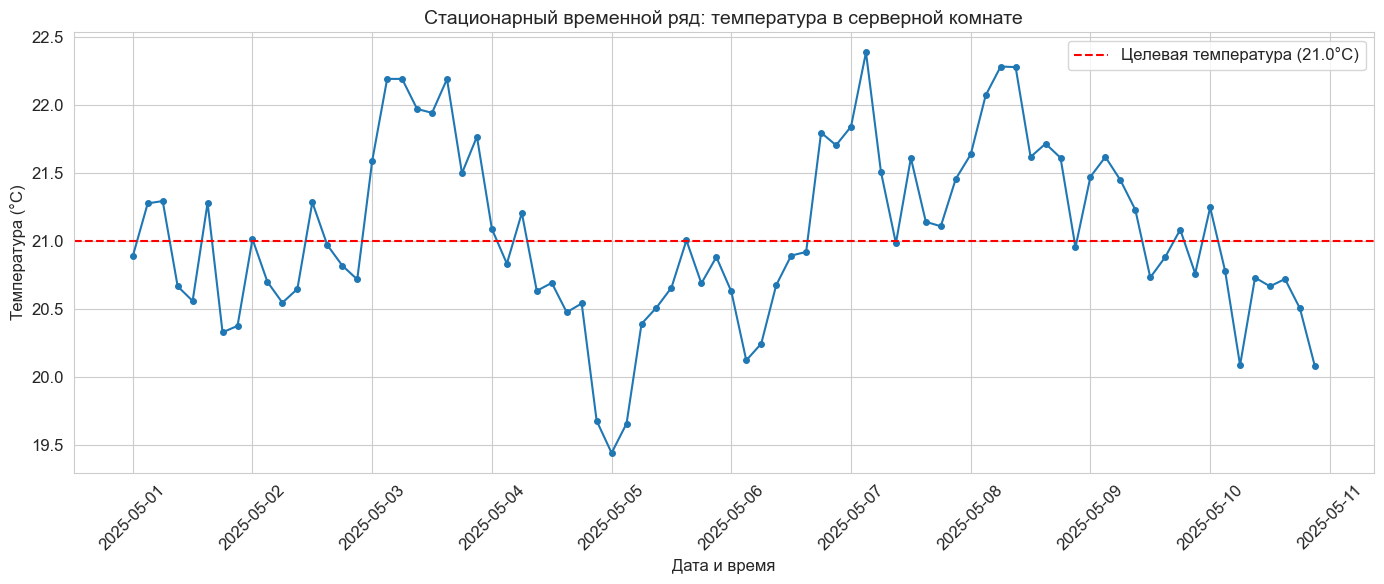


Проверка стационарности для ряда: Температура в серверной комнате


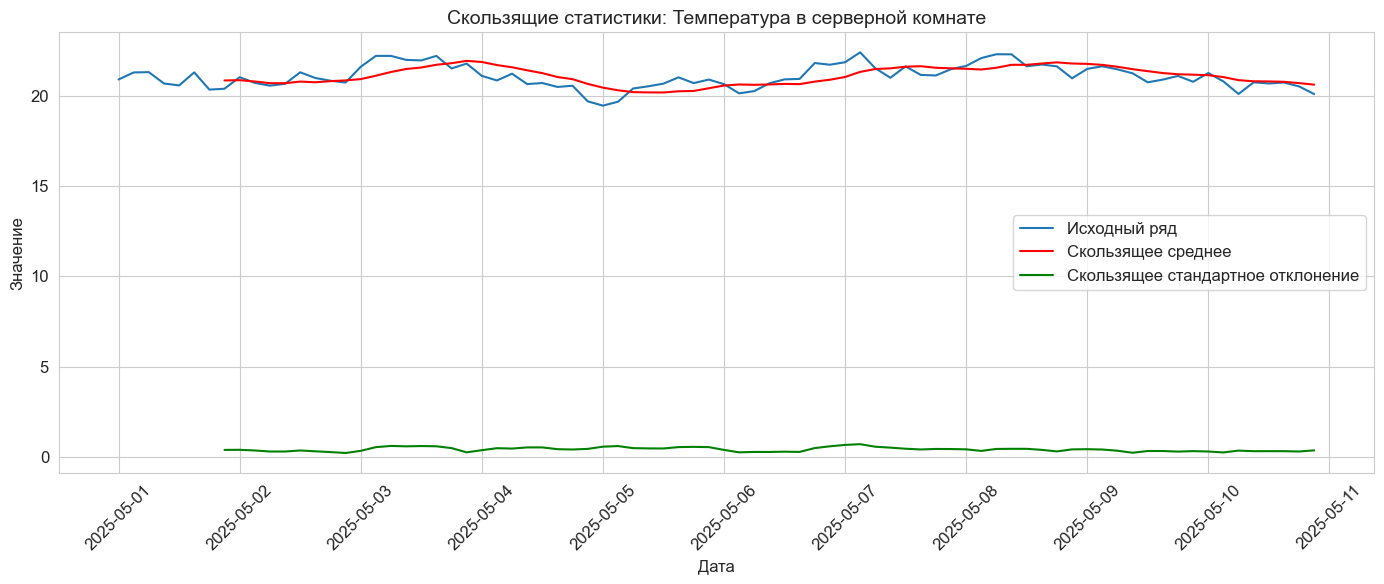

Результаты теста Дики-Фуллера:
ADF статистика: -2.9487
p-значение: 0.0400
Критические значения:
	1%: -3.5160
	5%: -2.8989
	10%: -2.5867
✓ Ряд стационарен (отвергаем нулевую гипотезу о наличии единичного корня)


In [103]:
# Продолжение кода - стационарный ряд температуры в серверной комнате
np.random.seed(123)

# Создаем даты для 10 дней с данными каждые 3 часа
start_date = datetime(2025, 5, 1)
dates_temp = []
for day in range(10):
    for hour in range(0, 24, 3):  # Каждые 3 часа
        dates_temp.append(start_date + timedelta(days=day, hours=hour))

# Генерируем данные для стационарного ряда
target_temp = 21.0  # Целевая температура в серверной
temp_std = 0.5      # Стандартное отклонение

# AR(1) модель для генерации стационарного ряда с автокорреляцией
ar_coef = 0.7       # Коэффициент авторегрессии
temperatures = [target_temp + np.random.normal(0, 0.1)]  # Начальное значение

for i in range(1, len(dates_temp)):
    # AR(1) процесс: x_t = μ + φ(x_{t-1} - μ) + ε_t
    prev_deviation = temperatures[-1] - target_temp
    next_deviation = ar_coef * prev_deviation + np.random.normal(0, temp_std * np.sqrt(1 - ar_coef**2))
    next_temp = target_temp + next_deviation
    temperatures.append(next_temp)

# Создаем DataFrame
temp_df = pd.DataFrame({
    'timestamp': dates_temp,
    'temperature': temperatures
})
temp_df.set_index('timestamp', inplace=True)

# Визуализируем стационарный ряд
plt.figure(figsize=(14, 6))
plt.plot(temp_df.index, temp_df['temperature'], marker='o', markersize=4)
plt.axhline(y=target_temp, color='r', linestyle='--', label=f'Целевая температура ({target_temp}°C)')
plt.title('Стационарный временной ряд: температура в серверной комнате', fontsize=14)
plt.xlabel('Дата и время', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Проверка стационарности с помощью теста Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries, title):
    """Проверка стационарности временного ряда с помощью теста Дики-Фуллера"""
    print(f"\nПроверка стационарности для ряда: {title}")
    
    # Скользящие статистики
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()
    
    # График скользящих статистик
    plt.figure(figsize=(14, 6))
    plt.plot(timeseries, label='Исходный ряд')
    plt.plot(rolling_mean, label='Скользящее среднее', color='red')
    plt.plot(rolling_std, label='Скользящее стандартное отклонение', color='green')
    plt.title(f'Скользящие статистики: {title}', fontsize=14)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Значение', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Тест Дики-Фуллера
    result = adfuller(timeseries.dropna())
    
    print('Результаты теста Дики-Фуллера:')
    print(f'ADF статистика: {result[0]:.4f}')
    print(f'p-значение: {result[1]:.4f}')
    print('Критические значения:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] <= 0.05:
        print("✓ Ряд стационарен (отвергаем нулевую гипотезу о наличии единичного корня)")
    else:
        print("✗ Ряд нестационарен (не можем отвергнуть нулевую гипотезу о наличии единичного корня)")

# Проверяем стационарность температурного ряда
check_stationarity(temp_df['temperature'], 'Температура в серверной комнате')

## 4. Нестационарные ряды 

Это ряды, статистические свойства которых изменяются со временем

### Пример из жизни: Температура воздуха в климат-контролируемом помещении
Температура в серверной комнате с климат-контролем колеблется вокруг заданного значения с постоянной дисперсией

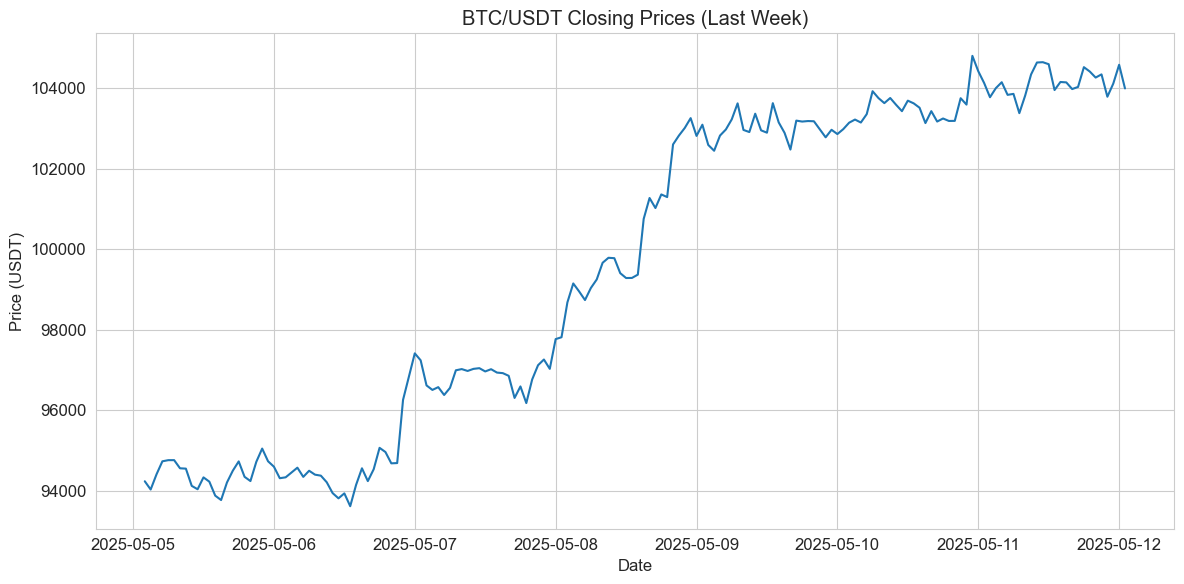

Тест стационарности для цен закрытия:
Результаты теста Дики-Фуллера:
ADF статистика: -0.8644
p-значение: 0.7995
Критические значения:
	1%: -3.4701
	5%: -2.8790
	10%: -2.5761
Ряд нестационарен (не можем отвергнуть нулевую гипотезу)


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import requests
from statsmodels.tsa.stattools import adfuller
import pytz

# Получаем данные BTCUSDT за последнюю неделю с Binance API
def get_btc_data():
    # Вычисляем временные метки для последней недели
    end_time = datetime.now(pytz.UTC)
    start_time = end_time - timedelta(days=7)
    
    # Конвертируем в миллисекунды для Binance API
    start_ms = int(start_time.timestamp() * 1000)
    end_ms = int(end_time.timestamp() * 1000)
    
    # Запрос к Binance API для получения свечей
    url = 'https://api.binance.com/api/v3/klines'
    params = {
        'symbol': 'BTCUSDT',
        'interval': '1h',  # Часовые интервалы
        'startTime': start_ms,
        'endTime': end_ms,
        'limit': 168       # Максимум 168 часов в неделе
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Преобразуем данные в DataFrame
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 
                                     'volume', 'close_time', 'quote_asset_volume', 
                                     'number_of_trades', 'taker_buy_base_asset_volume', 
                                     'taker_buy_quote_asset_volume', 'ignore'])
    
    # Конвертируем типы данных
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['close'] = df['close'].astype(float)
    
    # Устанавливаем timestamp как индекс
    df.set_index('timestamp', inplace=True)
    
    return df

# Получаем данные
btc_data = get_btc_data()

# Визуализируем цены закрытия
plt.figure(figsize=(12, 6))
plt.plot(btc_data['close'])
plt.title('BTC/USDT Closing Prices (Last Week)')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Проводим тест Дики-Фуллера на стационарность
def adf_test(series):
    result = adfuller(series.values)
    print('Результаты теста Дики-Фуллера:')
    print(f'ADF статистика: {result[0]:.4f}')
    print(f'p-значение: {result[1]:.4f}')
    print(f'Критические значения:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Интерпретация результата
    if result[1] <= 0.05:
        print("Ряд стационарен (отвергаем нулевую гипотезу)")
    else:
        print("Ряд нестационарен (не можем отвергнуть нулевую гипотезу)")

# Проводим тест стационарности для цен закрытия
print("Тест стационарности для цен закрытия:")
adf_test(btc_data['close'])

## Теперь приведем наш нестационарный ряд в стационарный
В этом коде мы используем метод дифференцирования (взятия разностей) для преобразования нестационарного ряда в стационарный

### Дифференцирование временного ряда - это процесс вычисления разностей между последовательными наблюдениями
$Y_t = X_t - X_{t-1}$
* X_t — цена закрытия BTC в текущий момент времени t
* X_{t-1} — цена закрытия BTC в предыдущий момент времени t-1
* Y_t — изменение цены между текущим и предыдущим моментами времени

#### Формула вычисляет разницу между текущим и предыдущим значениями ряда для каждого момента времени. В результате получается новый ряд, который отражает не абсолютные значения, а их изменения от одного наблюдения к другому

Или по простому, если у нас есть последовательность цен [100, 105, 103, 110], то после дифференцирования мы получим ряд [5, -2, 7]

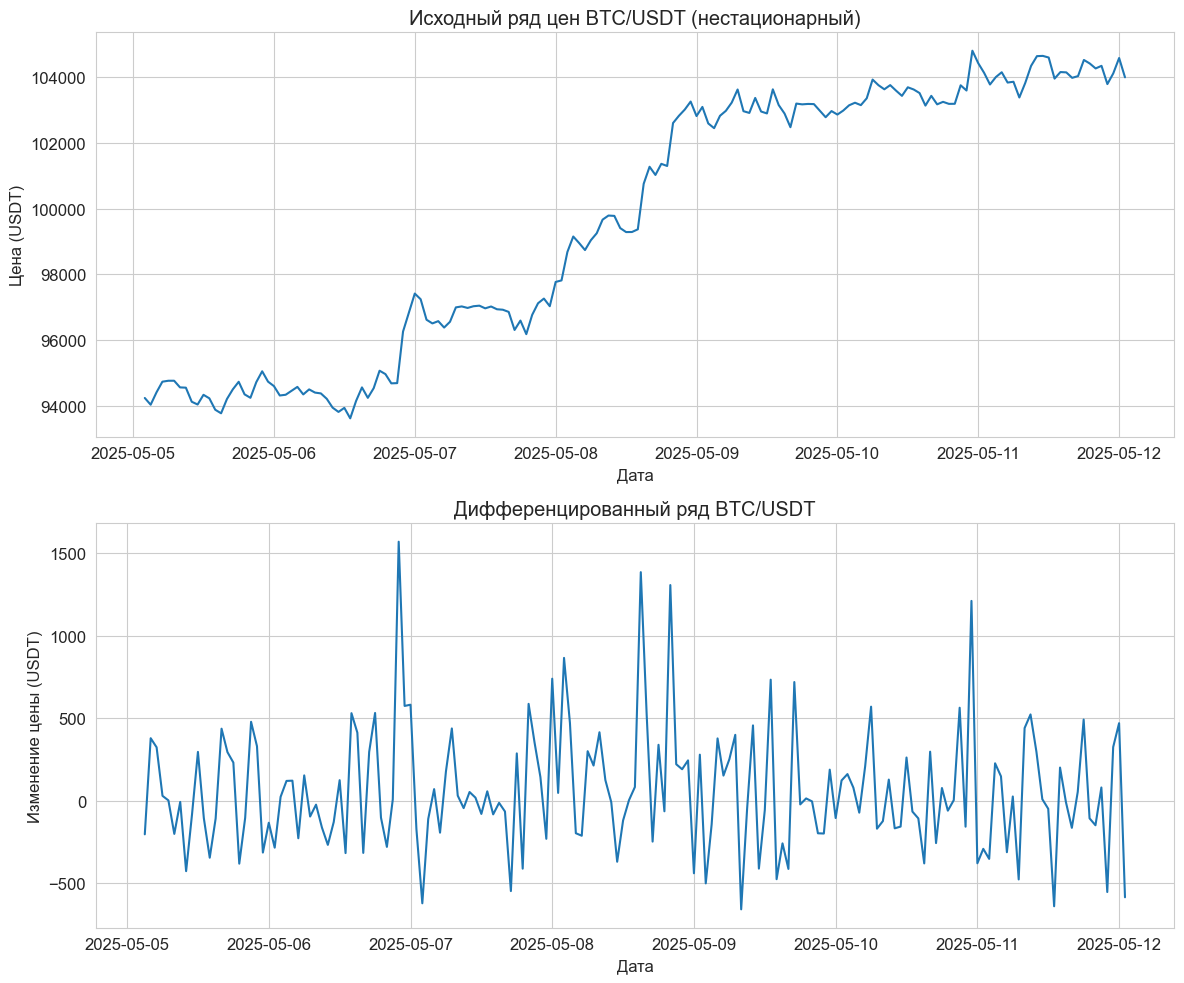


Тест стационарности для дифференцированного ряда:
Результаты теста Дики-Фуллера:
ADF статистика: -12.8127
p-значение: 0.0000
Критические значения:
	1%: -3.4704
	5%: -2.8791
	10%: -2.5761
Ряд стационарен (отвергаем нулевую гипотезу)


In [128]:
# Метод преобразования: Взятие разностей (дифференцирование)
btc_data['price_diff'] = btc_data['close'].diff().dropna()

# Визуализируем оба ряда для сравнения
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Исходный ряд
ax[0].plot(btc_data['close'])
ax[0].set_title('Исходный ряд цен BTC/USDT (нестационарный)')
ax[0].set_xlabel('Дата')
ax[0].set_ylabel('Цена (USDT)')
ax[0].grid(True)

# Дифференцированный ряд
ax[1].plot(btc_data['price_diff'])
ax[1].set_title('Дифференцированный ряд BTC/USDT')
ax[1].set_xlabel('Дата')
ax[1].set_ylabel('Изменение цены (USDT)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Проводим тест Дики-Фуллера для дифференцированного ряда
print("\nТест стационарности для дифференцированного ряда:")
adf_test(btc_data['price_diff'].dropna())

--- Сравнение типов временных рядов ---

1. Детерминированные ряды:
   + Легко прогнозируются с высокой точностью
   + Могут быть полностью описаны математической формулой
   - Редко встречаются в реальном мире в чистом виде

2. Недетерминированные ряды:
   + Более реалистично отражают большинство реальных процессов
   + Можно разложить на детерминированный и случайный компоненты
   - Прогнозируются с определенной степенью неопределенности

3. Стационарные ряды:
   + Имеют стабильные статистические свойства
   + Хорошо моделируются классическими методами
   - Многие реальные процессы не являются стационарными

4. Нестационарные ряды:
   + Отражают большинство экономических и финансовых процессов
   + Могут быть преобразованы в стационарные для моделирования
   - Требуют дополнительной предобработки перед анализом

Рекомендации:
1. Всегда начинайте с проверки на стационарность
2. Для нестационарных рядов используйте преобразования:
   - Дифференцирование
   - Логарифмирование
   - И тд